In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/home/alger.remirata/data/phoenix2019_data/training_dataset_nonpersonal.csv')

/home/karkin.mun/environments/ml_dir/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (12,14,19,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(data.columns)

45

In [4]:
data.head()

,_id,cc_hash,cc_category,transaction_time,billing_currency,cc_organization,transaction_id_ext,merch_name,transaction_date,transaction_gmt_datetime,...,errors,total_score,score_from_ai,blocked,whitelisted,plugin_data,response,utc_datetime,had_ai_downtime,label
0,5b7280d8970afc0ef9c650f9,3ccf88c2c82086311c7f3343f49ecaa72c0b7276ca8e57...,CLASSIC,54744.493,SGD,BRANCH BANKING AND TRUST COMPANY,ESV20180814000453,Resort World Sentosa - ESERVICES,1.534205e+09,1.534231e+09,...,NaN,16.0,0.000000,False,False,NaN,"{""code"": 216, ""decline_rule"": null, ""error"": f...",2018-08-14 07:08:1534230744,True,1
1,5b72d5ff970afc0ef6c66b54,3ccf88c2c82086311c7f3343f49ecaa72c0b7276ca8e57...,CLASSIC,76543.273,SGD,BRANCH BANKING AND TRUST COMPANY,ESV20180814000745,Resort World Sentosa - ESERVICES,1.534205e+09,1.534253e+09,...,NaN,36.0,20.000000,False,False,"{""tx_id"": ""5b72d5ff970afc0ef6c66b54"", ""plugin_...","{""code"": 236, ""decline_rule"": null, ""error"": f...",2018-08-14 13:08:1534252543,False,1
2,5b72deae970afc0ef8282acb,3ccf88c2c82086311c7f3343f49ecaa72c0b7276ca8e57...,CLASSIC,78766.510,SGD,BRANCH BANKING AND TRUST COMPANY,ESV20180814000785,Resort World Sentosa - ESERVICES,1.534205e+09,1.534255e+09,...,NaN,36.0,20.000000,False,False,"{""tx_id"": ""5b72deae970afc0ef8282acb"", ""plugin_...","{""code"": 236, ""decline_rule"": null, ""error"": f...",2018-08-14 13:08:1534254766,False,1
3,5b73208187977a7d149f8d69,3ccf88c2c82086311c7f3343f49ecaa72c0b7276ca8e57...,CLASSIC,9217.191,SGD,BRANCH BANKING AND TRUST COMPANY,ESV20180815000060,Resort World Sentosa - ESERVICES,1.534291e+09,1.534272e+09,...,NaN,99.0,117.723587,False,False,"{""plugin_results"": {""credit_master"": {""score"":...","{""code"": 299, ""decline_rule"": null, ""error"": f...",2018-08-14 18:08:1534271617,False,1
4,5b73260087977a7d159a095d,3ccf88c2c82086311c7f3343f49ecaa72c0b7276ca8e57...,CLASSIC,10624.755,SGD,BRANCH BANKING AND TRUST COMPANY,ESV20180815000068,Resort World Sentosa - ESERVICES,1.534291e+09,1.534273e+09,...,NaN,43.0,27.000000,False,False,"{""plugin_results"": {""clusters_ps"": {""debug_rea...","{""code"": 243, ""decline_rule"": null, ""error"": f...",2018-08-14 18:08:1534273024,False,1


In [5]:
data['label'].value_counts()

0    1562064
1        426
Name: label, dtype: int64

0.027 % fraud 

In [6]:
(sum(data['label'] == 1)/len(data))*100

0.027264174490716744

In [7]:
missing_val = data.isna().sum().values / len(data)

In [8]:
import numpy as np

for i, val in enumerate(missing_val):
    print("{:30}: {:5} % missing values".format(data.columns[i], round(val, 2) * 100))

_id                           :   0.0 % missing values
cc_hash                       :   0.0 % missing values
cc_category                   :   0.0 % missing values
transaction_time              :   0.0 % missing values
billing_currency              :   0.0 % missing values
cc_organization               :   0.0 % missing values
transaction_id_ext            :   0.0 % missing values
merch_name                    :   0.0 % missing values
transaction_date              :   0.0 % missing values
transaction_gmt_datetime      :   0.0 % missing values
transaction_datetime          :   0.0 % missing values
user_ipv4_country             :   1.0 % missing values
user_ipv6_country             : 100.0 % missing values
user_ip_country               :   1.0 % missing values
billing_country_alpha2        :  99.0 % missing values
merch_id                      :   0.0 % missing values
cc_type                       :   0.0 % missing values
cc_exp_date                   :   0.0 % missing values
cc_brand  

In [9]:
data = data.drop(['user_ipv6_country', 
           'billing_country_alpha2', 
           "transaction_id_merch",
"shipping_postal_code",          
"shipping_state",                
"user_phone",                    
"transaction_delivery_mode", 
"ticket_date",                   
"ticket_count",                  
"ticket_multiuse",               
"ticket_type_bundle",            
"hotel_checkin_date",            
"hotel_number_nights",  
"hotel_number_rooms",            
"hotel_country_alpha2",          
"hotel_city",                    
"nonhotel_billing_amt",          
"errors"                        ], axis=1)


In [10]:
data = data.dropna()

data.shape

(1510063, 27)

In [11]:
data.head()

,_id,cc_hash,cc_category,transaction_time,billing_currency,cc_organization,transaction_id_ext,merch_name,transaction_date,transaction_gmt_datetime,...,transaction_channel,total_score,score_from_ai,blocked,whitelisted,plugin_data,response,utc_datetime,had_ai_downtime,label
1,5b72d5ff970afc0ef6c66b54,3ccf88c2c82086311c7f3343f49ecaa72c0b7276ca8e57...,CLASSIC,76543.273,SGD,BRANCH BANKING AND TRUST COMPANY,ESV20180814000745,Resort World Sentosa - ESERVICES,1.534205e+09,1.534253e+09,...,0.0,36.0,20.000000,False,False,"{""tx_id"": ""5b72d5ff970afc0ef6c66b54"", ""plugin_...","{""code"": 236, ""decline_rule"": null, ""error"": f...",2018-08-14 13:08:1534252543,False,1
2,5b72deae970afc0ef8282acb,3ccf88c2c82086311c7f3343f49ecaa72c0b7276ca8e57...,CLASSIC,78766.510,SGD,BRANCH BANKING AND TRUST COMPANY,ESV20180814000785,Resort World Sentosa - ESERVICES,1.534205e+09,1.534255e+09,...,0.0,36.0,20.000000,False,False,"{""tx_id"": ""5b72deae970afc0ef8282acb"", ""plugin_...","{""code"": 236, ""decline_rule"": null, ""error"": f...",2018-08-14 13:08:1534254766,False,1
3,5b73208187977a7d149f8d69,3ccf88c2c82086311c7f3343f49ecaa72c0b7276ca8e57...,CLASSIC,9217.191,SGD,BRANCH BANKING AND TRUST COMPANY,ESV20180815000060,Resort World Sentosa - ESERVICES,1.534291e+09,1.534272e+09,...,0.0,99.0,117.723587,False,False,"{""plugin_results"": {""credit_master"": {""score"":...","{""code"": 299, ""decline_rule"": null, ""error"": f...",2018-08-14 18:08:1534271617,False,1
4,5b73260087977a7d159a095d,3ccf88c2c82086311c7f3343f49ecaa72c0b7276ca8e57...,CLASSIC,10624.755,SGD,BRANCH BANKING AND TRUST COMPANY,ESV20180815000068,Resort World Sentosa - ESERVICES,1.534291e+09,1.534273e+09,...,0.0,43.0,27.000000,False,False,"{""plugin_results"": {""clusters_ps"": {""debug_rea...","{""code"": 243, ""decline_rule"": null, ""error"": f...",2018-08-14 18:08:1534273024,False,1
5,5b73372b87977a7d159a0966,3ccf88c2c82086311c7f3343f49ecaa72c0b7276ca8e57...,CLASSIC,15019.081,SGD,BRANCH BANKING AND TRUST COMPANY,ESV20180815000096,Resort World Sentosa - ESERVICES,1.534291e+09,1.534277e+09,...,0.0,99.0,252.479419,False,False,"{""plugin_results"": {""clusters_ps"": {""debug_rea...","{""code"": 299, ""decline_rule"": null, ""error"": f...",2018-08-14 20:08:1534277419,False,1


In [12]:
columns_probably_not_required = ["plugin_data", "response", "score_from_ai", "transaction_id_ext", "_id", "cc_hash"]

data = data.drop(columns_probably_not_required, axis = 1)

data.head()

,cc_category,transaction_time,billing_currency,cc_organization,merch_name,transaction_date,transaction_gmt_datetime,transaction_datetime,user_ipv4_country,user_ip_country,...,cc_type,cc_exp_date,cc_brand,transaction_channel,total_score,blocked,whitelisted,utc_datetime,had_ai_downtime,label
1,CLASSIC,76543.273,SGD,BRANCH BANKING AND TRUST COMPANY,Resort World Sentosa - ESERVICES,1.534205e+09,1.534253e+09,2018-08-15 05:15:43.273,US,US,...,DEBIT,1.561939e+09,VISA,0.0,36.0,False,False,2018-08-14 13:08:1534252543,False,1
2,CLASSIC,78766.510,SGD,BRANCH BANKING AND TRUST COMPANY,Resort World Sentosa - ESERVICES,1.534205e+09,1.534255e+09,2018-08-15 05:52:46.510,US,US,...,DEBIT,1.561939e+09,VISA,0.0,36.0,False,False,2018-08-14 13:08:1534254766,False,1
3,CLASSIC,9217.191,SGD,BRANCH BANKING AND TRUST COMPANY,Resort World Sentosa - ESERVICES,1.534291e+09,1.534272e+09,2018-08-15 10:33:37.191,US,US,...,DEBIT,1.561939e+09,VISA,0.0,99.0,False,False,2018-08-14 18:08:1534271617,False,1
4,CLASSIC,10624.755,SGD,BRANCH BANKING AND TRUST COMPANY,Resort World Sentosa - ESERVICES,1.534291e+09,1.534273e+09,2018-08-15 10:57:04.755,JP,JP,...,DEBIT,1.561939e+09,VISA,0.0,43.0,False,False,2018-08-14 18:08:1534273024,False,1
5,CLASSIC,15019.081,SGD,BRANCH BANKING AND TRUST COMPANY,Resort World Sentosa - ESERVICES,1.534291e+09,1.534277e+09,2018-08-15 12:10:19.081,US,US,...,DEBIT,1.604189e+09,VISA,0.0,99.0,False,False,2018-08-14 20:08:1534277419,False,1


In [13]:
data.columns

Index(['cc_category', 'transaction_time', 'billing_currency',
       'cc_organization', 'merch_name', 'transaction_date',
       'transaction_gmt_datetime', 'transaction_datetime', 'user_ipv4_country',
       'user_ip_country', 'merch_id', 'cc_type', 'cc_exp_date', 'cc_brand',
       'transaction_channel', 'total_score', 'blocked', 'whitelisted',
       'utc_datetime', 'had_ai_downtime', 'label'],
      dtype='object')

In [14]:
from collections import Counter

Counter(data['cc_category'])

Counter({'AADVANTAGE': 5,
         'AIRMILES PREMIER': 37,
         'ALIMENTACAO': 2,
         'B2B': 8,
         'BLACK': 135,
         'BLUE': 2,
         'BLUE CHARGE': 10,
         'BLUE REVOLVE': 1,
         'BUSINESS': 34272,
         'BUSINESS PLATINUM': 49,
         'BUSINESS SIGNATURE': 180,
         'BUSINESS/CLASSIC': 8,
         'BUSINESS/STANDARD': 23,
         'CANADA CHARGE CARD': 1,
         'CANADA CHARGE CARD - GRCC': 1,
         'CCSG LENDING': 36,
         'CENTURION': 52,
         'CHARGE CARD': 1,
         'CLASSIC': 423653,
         'CLASSIC/PLATINUM': 7,
         'COMMERCIAL': 5,
         'COMPANY': 53,
         'COMPANY GOLD': 2,
         'COMPANY REVOLVE': 2,
         'CONSUMER CHARGE': 47,
         'CONSUMER LENDING': 28,
         'CONSUMER LIMITS EXPANSION': 1,
         'CONSUMER REVOLVE': 7,
         'CONSUMER REVOLVE (CO-BRAND)': 5,
         'CORPORATE': 793,
         'CORPORATE CARD': 1,
         'CORPORATE CO- BRAND': 1,
         'CORPORATE CO-BRAND CHAR

In [15]:
cat_columns_non_ordinal = ["cc_category", "cc_organization", "merch_name", 
                           "user_ipv4_country", "user_ip_country", "merch_id",
                            "cc_type", "cc_brand", "billing_currency"]
# NOTE: 
# if the columns found in cat_columns_non_ordinal are to be used for training models, there is a need to one hot encode them 
# binning may ne necessary if there's too many categories
# for the time being, they will not be one hot encoded yet 
# ok to use it for analysis 

d = {} 
for col in cat_columns_non_ordinal:
    # Can only use .cat accessor with a 'category' dtype"
    data[col] = data[col].astype("category")
    
    d[col] = dict(enumerate(data[col].cat.categories))

    
data[cat_columns_non_ordinal] = data[cat_columns_non_ordinal].apply(lambda x: x.cat.codes)

In [16]:
d

{'billing_currency': {0: 'IDR',
  1: 'MYR',
  2: 'PHP',
  3: 'SGD',
  4: 'THB',
  5: 'USD'},
 'cc_brand': {0: 'AMERICAN EXPRESS',
  1: 'AMERICAN EXPRESS COMPANY',
  2: 'CARNET',
  3: 'EBT',
  4: 'ELO',
  5: 'JCB',
  6: 'LOCAL BRAND',
  7: 'MAESTRO',
  8: 'MASTERCARD',
  9: 'PRIVATE LABEL',
  10: 'VISA',
  11: 'VISA/DANKORT'},
 'cc_category': {0: 'AADVANTAGE',
  1: 'AIRMILES PREMIER',
  2: 'ALIMENTACAO',
  3: 'B2B',
  4: 'BLACK',
  5: 'BLUE',
  6: 'BLUE CHARGE',
  7: 'BLUE REVOLVE',
  8: 'BUSINESS',
  9: 'BUSINESS PLATINUM',
  10: 'BUSINESS SIGNATURE',
  11: 'BUSINESS/CLASSIC',
  12: 'BUSINESS/STANDARD',
  13: 'CANADA CHARGE CARD',
  14: 'CANADA CHARGE CARD - GRCC',
  15: 'CCSG LENDING',
  16: 'CENTURION',
  17: 'CHARGE CARD',
  18: 'CLASSIC',
  19: 'CLASSIC/PLATINUM',
  20: 'COMMERCIAL',
  21: 'COMPANY',
  22: 'COMPANY GOLD',
  23: 'COMPANY REVOLVE',
  24: 'CONSUMER CHARGE',
  25: 'CONSUMER LENDING',
  26: 'CONSUMER LIMITS EXPANSION',
  27: 'CONSUMER REVOLVE',
  28: 'CONSUMER REVOLVE (

In [17]:
# data["cc_brand"].astype("category").cat.codes

In [18]:
data.head()

,cc_category,transaction_time,billing_currency,cc_organization,merch_name,transaction_date,transaction_gmt_datetime,transaction_datetime,user_ipv4_country,user_ip_country,...,cc_type,cc_exp_date,cc_brand,transaction_channel,total_score,blocked,whitelisted,utc_datetime,had_ai_downtime,label
1,18,76543.273,3,689,168,1.534205e+09,1.534253e+09,2018-08-15 05:15:43.273,159,159,...,2,1.561939e+09,10,0.0,36.0,False,False,2018-08-14 13:08:1534252543,False,1
2,18,78766.510,3,689,168,1.534205e+09,1.534255e+09,2018-08-15 05:52:46.510,159,159,...,2,1.561939e+09,10,0.0,36.0,False,False,2018-08-14 13:08:1534254766,False,1
3,18,9217.191,3,689,168,1.534291e+09,1.534272e+09,2018-08-15 10:33:37.191,159,159,...,2,1.561939e+09,10,0.0,99.0,False,False,2018-08-14 18:08:1534271617,False,1
4,18,10624.755,3,689,168,1.534291e+09,1.534273e+09,2018-08-15 10:57:04.755,77,77,...,2,1.561939e+09,10,0.0,43.0,False,False,2018-08-14 18:08:1534273024,False,1
5,18,15019.081,3,689,168,1.534291e+09,1.534277e+09,2018-08-15 12:10:19.081,159,159,...,2,1.604189e+09,10,0.0,99.0,False,False,2018-08-14 20:08:1534277419,False,1


In [19]:
data['label'].value_counts()

0    1509649
1        414
Name: label, dtype: int64

In [20]:
# drop unnecessary date time column

data = data.drop(["transaction_date", "transaction_gmt_datetime", "transaction_time"], axis=1)


In [21]:
data = data.drop(["utc_datetime"], axis=1)

In [22]:
data.head()

,cc_category,billing_currency,cc_organization,merch_name,transaction_datetime,user_ipv4_country,user_ip_country,merch_id,cc_type,cc_exp_date,cc_brand,transaction_channel,total_score,blocked,whitelisted,had_ai_downtime,label
1,18,3,689,168,2018-08-15 05:15:43.273,159,159,5,2,1.561939e+09,10,0.0,36.0,False,False,False,1
2,18,3,689,168,2018-08-15 05:52:46.510,159,159,5,2,1.561939e+09,10,0.0,36.0,False,False,False,1
3,18,3,689,168,2018-08-15 10:33:37.191,159,159,5,2,1.561939e+09,10,0.0,99.0,False,False,False,1
4,18,3,689,168,2018-08-15 10:57:04.755,77,77,5,2,1.561939e+09,10,0.0,43.0,False,False,False,1
5,18,3,689,168,2018-08-15 12:10:19.081,159,159,5,2,1.604189e+09,10,0.0,99.0,False,False,False,1


In [23]:
X = data.loc[:, data.columns != 'label']
y = data['label']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [25]:
X_train.head()

,cc_category,billing_currency,cc_organization,merch_name,transaction_datetime,user_ipv4_country,user_ip_country,merch_id,cc_type,cc_exp_date,cc_brand,transaction_channel,total_score,blocked,whitelisted,had_ai_downtime
1040381,94,1,1374,195,2018-10-26 15:40:50.487000,107,107,170,1,1.606781e+09,8,0.0,2.0,False,False,False
1263276,54,1,2130,195,2018-12-23 03:19:30.136000,107,107,170,1,1.646093e+09,10,0.0,2.0,False,False,False
1266,94,1,509,195,2018-01-01 21:03:19.102000,107,107,170,2,1.633046e+09,8,0.0,2.0,False,False,False
1145628,54,1,1384,246,2018-11-26 00:46:37.749000,107,107,63,2,1.593562e+09,10,0.0,2.0,False,False,False
108506,94,1,1398,195,2018-02-17 18:09:53.234000,107,107,170,1,1.619827e+09,10,0.0,2.0,False,False,False


In [26]:
y_train.head()

1040381    0
1263276    0
1266       0
1145628    0
108506     0
Name: label, dtype: int64

## Data Analysis 

In [27]:
data["transaction_datetime"] = pd.to_datetime(data["transaction_datetime"], format = '%Y-%m-%d %H:%M:%S')

In [28]:
data.dtypes

cc_category                      int16
billing_currency                  int8
cc_organization                  int16
merch_name                       int16
transaction_datetime    datetime64[ns]
user_ipv4_country                int16
user_ip_country                  int16
merch_id                         int16
cc_type                           int8
cc_exp_date                    float64
cc_brand                          int8
transaction_channel            float64
total_score                    float64
blocked                           bool
whitelisted                       bool
had_ai_downtime                   bool
label                            int64
dtype: object

In [29]:
len(data.dtypes)

17

In [30]:
data.head()

,cc_category,billing_currency,cc_organization,merch_name,transaction_datetime,user_ipv4_country,user_ip_country,merch_id,cc_type,cc_exp_date,cc_brand,transaction_channel,total_score,blocked,whitelisted,had_ai_downtime,label
1,18,3,689,168,2018-08-15 05:15:43.273,159,159,5,2,1.561939e+09,10,0.0,36.0,False,False,False,1
2,18,3,689,168,2018-08-15 05:52:46.510,159,159,5,2,1.561939e+09,10,0.0,36.0,False,False,False,1
3,18,3,689,168,2018-08-15 10:33:37.191,159,159,5,2,1.561939e+09,10,0.0,99.0,False,False,False,1
4,18,3,689,168,2018-08-15 10:57:04.755,77,77,5,2,1.561939e+09,10,0.0,43.0,False,False,False,1
5,18,3,689,168,2018-08-15 12:10:19.081,159,159,5,2,1.604189e+09,10,0.0,99.0,False,False,False,1


In [31]:
# data.set_index('transaction_datetime')

In [32]:
pd.to_datetime(data["transaction_datetime"].values).to_period('Y')

PeriodIndex(['2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018',
             ...
             '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019',
             '2019', '2019'],
            dtype='period[A-DEC]', length=1510063, freq='A-DEC')

In [33]:
data['time_of_day'] = data["transaction_datetime"].dt.hour + data["transaction_datetime"].dt.minute/60

In [34]:
data.head()

,cc_category,billing_currency,cc_organization,merch_name,transaction_datetime,user_ipv4_country,user_ip_country,merch_id,cc_type,cc_exp_date,cc_brand,transaction_channel,total_score,blocked,whitelisted,had_ai_downtime,label,time_of_day
1,18,3,689,168,2018-08-15 05:15:43.273,159,159,5,2,1.561939e+09,10,0.0,36.0,False,False,False,1,5.250000
2,18,3,689,168,2018-08-15 05:52:46.510,159,159,5,2,1.561939e+09,10,0.0,36.0,False,False,False,1,5.866667
3,18,3,689,168,2018-08-15 10:33:37.191,159,159,5,2,1.561939e+09,10,0.0,99.0,False,False,False,1,10.550000
4,18,3,689,168,2018-08-15 10:57:04.755,77,77,5,2,1.561939e+09,10,0.0,43.0,False,False,False,1,10.950000
5,18,3,689,168,2018-08-15 12:10:19.081,159,159,5,2,1.604189e+09,10,0.0,99.0,False,False,False,1,12.166667


In [35]:
data['time_of_day_hr'] = data["transaction_datetime"].dt.hour

In [36]:
time_analysis_df = data[["label", "time_of_day_hr"]].groupby('time_of_day_hr')

Text(0.5, 1.0, 'Number of Transactions Against Time (Hour)')

<Figure size 432x288 with 0 Axes>

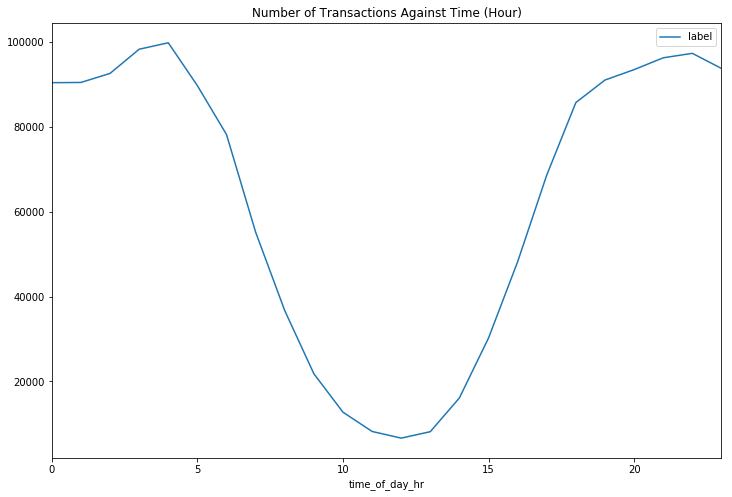

In [38]:
import matplotlib.pyplot as plt

plt.figure()
ax = time_analysis_df.count().plot(figsize=(12, 8))
ax.set_title("Number of Transactions Against Time (Hour)")


Text(0.5, 1.0, 'Number of Frauds Against Time (Hour)')

<Figure size 432x288 with 0 Axes>

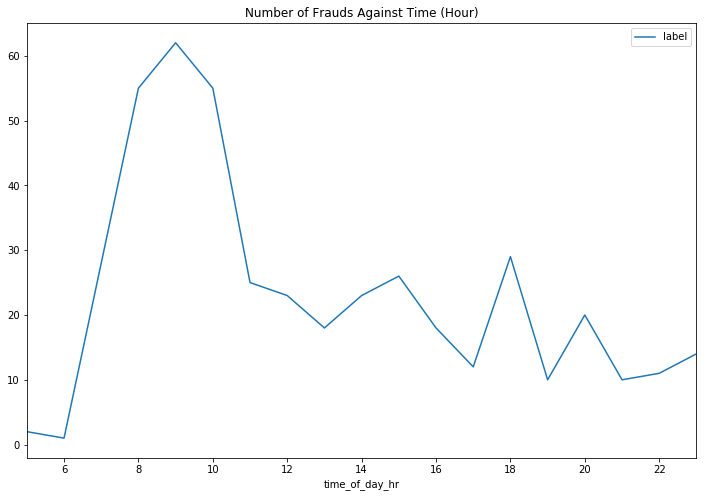

In [39]:
time_analysis_df_fraud = data[data['label']==1][["label", "time_of_day_hr"]].groupby('time_of_day_hr')

plt.figure()
ax = time_analysis_df_fraud.count().plot(figsize=(12, 8))
ax.set_title("Number of Frauds Against Time (Hour)")

In [40]:
df_fraud = data[data['label'] == 1]

df_fraud.head()

,cc_category,billing_currency,cc_organization,merch_name,transaction_datetime,user_ipv4_country,user_ip_country,merch_id,cc_type,cc_exp_date,cc_brand,transaction_channel,total_score,blocked,whitelisted,had_ai_downtime,label,time_of_day,time_of_day_hr
1,18,3,689,168,2018-08-15 05:15:43.273,159,159,5,2,1.561939e+09,10,0.0,36.0,False,False,False,1,5.250000,5
2,18,3,689,168,2018-08-15 05:52:46.510,159,159,5,2,1.561939e+09,10,0.0,36.0,False,False,False,1,5.866667,5
3,18,3,689,168,2018-08-15 10:33:37.191,159,159,5,2,1.561939e+09,10,0.0,99.0,False,False,False,1,10.550000,10
4,18,3,689,168,2018-08-15 10:57:04.755,77,77,5,2,1.561939e+09,10,0.0,43.0,False,False,False,1,10.950000,10
5,18,3,689,168,2018-08-15 12:10:19.081,159,159,5,2,1.604189e+09,10,0.0,99.0,False,False,False,1,12.166667,12


In [41]:
df_bill_curr = data[["label", "billing_currency"]].groupby("billing_currency")

df_bill_curr.count()

,label
billing_currency,
0,78
1,1417343
2,18755
3,71906
4,1956
5,25


In [42]:
d['billing_currency']

{0: 'IDR', 1: 'MYR', 2: 'PHP', 3: 'SGD', 4: 'THB', 5: 'USD'}

In [43]:
data[data["label"]==1][["label", "billing_currency"]].groupby("billing_currency").count()

,label
billing_currency,
3,414


In [44]:
for col in data.columns:
    if col in ["transaction_datetime", "cc_exp_date", "transaction_channel", "total_score", "had_ai_downtime", "blocked", "whitelisted", "label", "time_of_day", "time_of_day_hr"]:
        continue 
    print(d[col])
    print(data[data["label"]==1][["label", col]].groupby(col).count())
    print("\n\n")
    

{0: 'AADVANTAGE', 1: 'AIRMILES PREMIER', 2: 'ALIMENTACAO', 3: 'B2B', 4: 'BLACK', 5: 'BLUE', 6: 'BLUE CHARGE', 7: 'BLUE REVOLVE', 8: 'BUSINESS', 9: 'BUSINESS PLATINUM', 10: 'BUSINESS SIGNATURE', 11: 'BUSINESS/CLASSIC', 12: 'BUSINESS/STANDARD', 13: 'CANADA CHARGE CARD', 14: 'CANADA CHARGE CARD - GRCC', 15: 'CCSG LENDING', 16: 'CENTURION', 17: 'CHARGE CARD', 18: 'CLASSIC', 19: 'CLASSIC/PLATINUM', 20: 'COMMERCIAL', 21: 'COMPANY', 22: 'COMPANY GOLD', 23: 'COMPANY REVOLVE', 24: 'CONSUMER CHARGE', 25: 'CONSUMER LENDING', 26: 'CONSUMER LIMITS EXPANSION', 27: 'CONSUMER REVOLVE', 28: 'CONSUMER REVOLVE (CO-BRAND)', 29: 'CORPORATE', 30: 'CORPORATE CARD', 31: 'CORPORATE CO- BRAND', 32: 'CORPORATE CO-BRAND CHARGE', 33: 'CORPORATE EXECUTIVE', 34: 'CORPORATE FLEET', 35: 'CORPORATE GREEN CHARGE', 36: 'CORPORATE NETWORK CARD', 37: 'CORPORATE PURCHASING', 38: 'CORPORATE T & E', 39: 'CORPORATE T&E', 40: 'CORPORATE- COBRAND', 41: 'CORPORATE/BUSINESS', 42: 'CREDIT COEMITIDA', 43: 'ELECTRON', 44: 'ELECTRONIC

In [45]:
data_exploration = data.drop(["transaction_datetime", "cc_exp_date", "transaction_channel", "total_score", "had_ai_downtime", "blocked", "whitelisted", "label", "time_of_day", "time_of_day_hr"], axis=1)

In [208]:
data_exploration.head()

,cc_category,billing_currency,cc_organization,merch_name,user_ipv4_country,user_ip_country,merch_id,cc_type,cc_brand
1,18,3,689,168,159,159,5,2,10
2,18,3,689,168,159,159,5,2,10
3,18,3,689,168,159,159,5,2,10
4,18,3,689,168,77,77,5,2,10
5,18,3,689,168,159,159,5,2,10


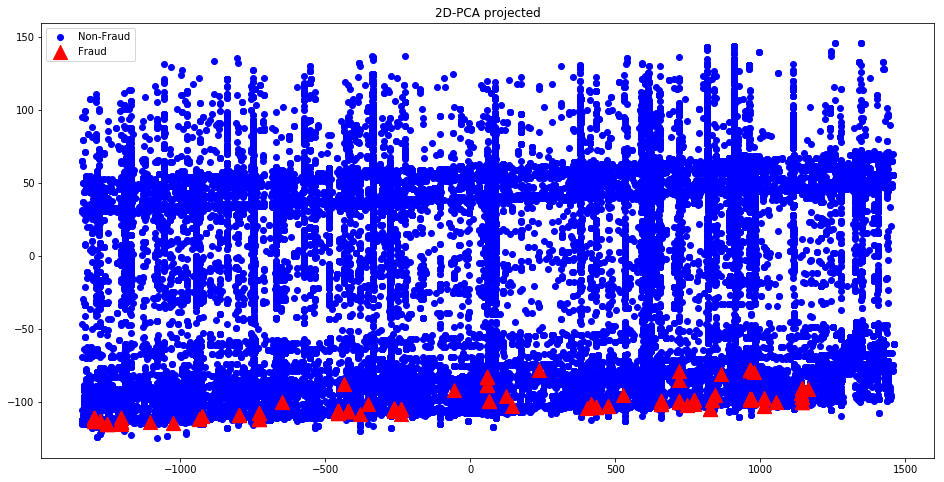

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data_exploration.values)  
data_trans = pca.transform(data_exploration.values)


plt.figure(figsize=(16, 8))
plt.scatter(data_trans[data['label'].values == 0][:, 0], data_trans[data['label'].values == 0][:, 1], color = 'b', label = 'Non-Fraud')
plt.scatter(data_trans[data['label'].values == 1][:, 0], data_trans[data['label'].values == 1][:, 1], color = 'r', s = 200, marker = '^', label = 'Fraud')
plt.title('2D-PCA projected')
plt.legend()


In [47]:
pca_3d = PCA(n_components=3)
pca_3d.fit(data_exploration.values)  
data_trans_3d = pca_3d.transform(data_exploration.values)


<IPython.core.display.Javascript object>


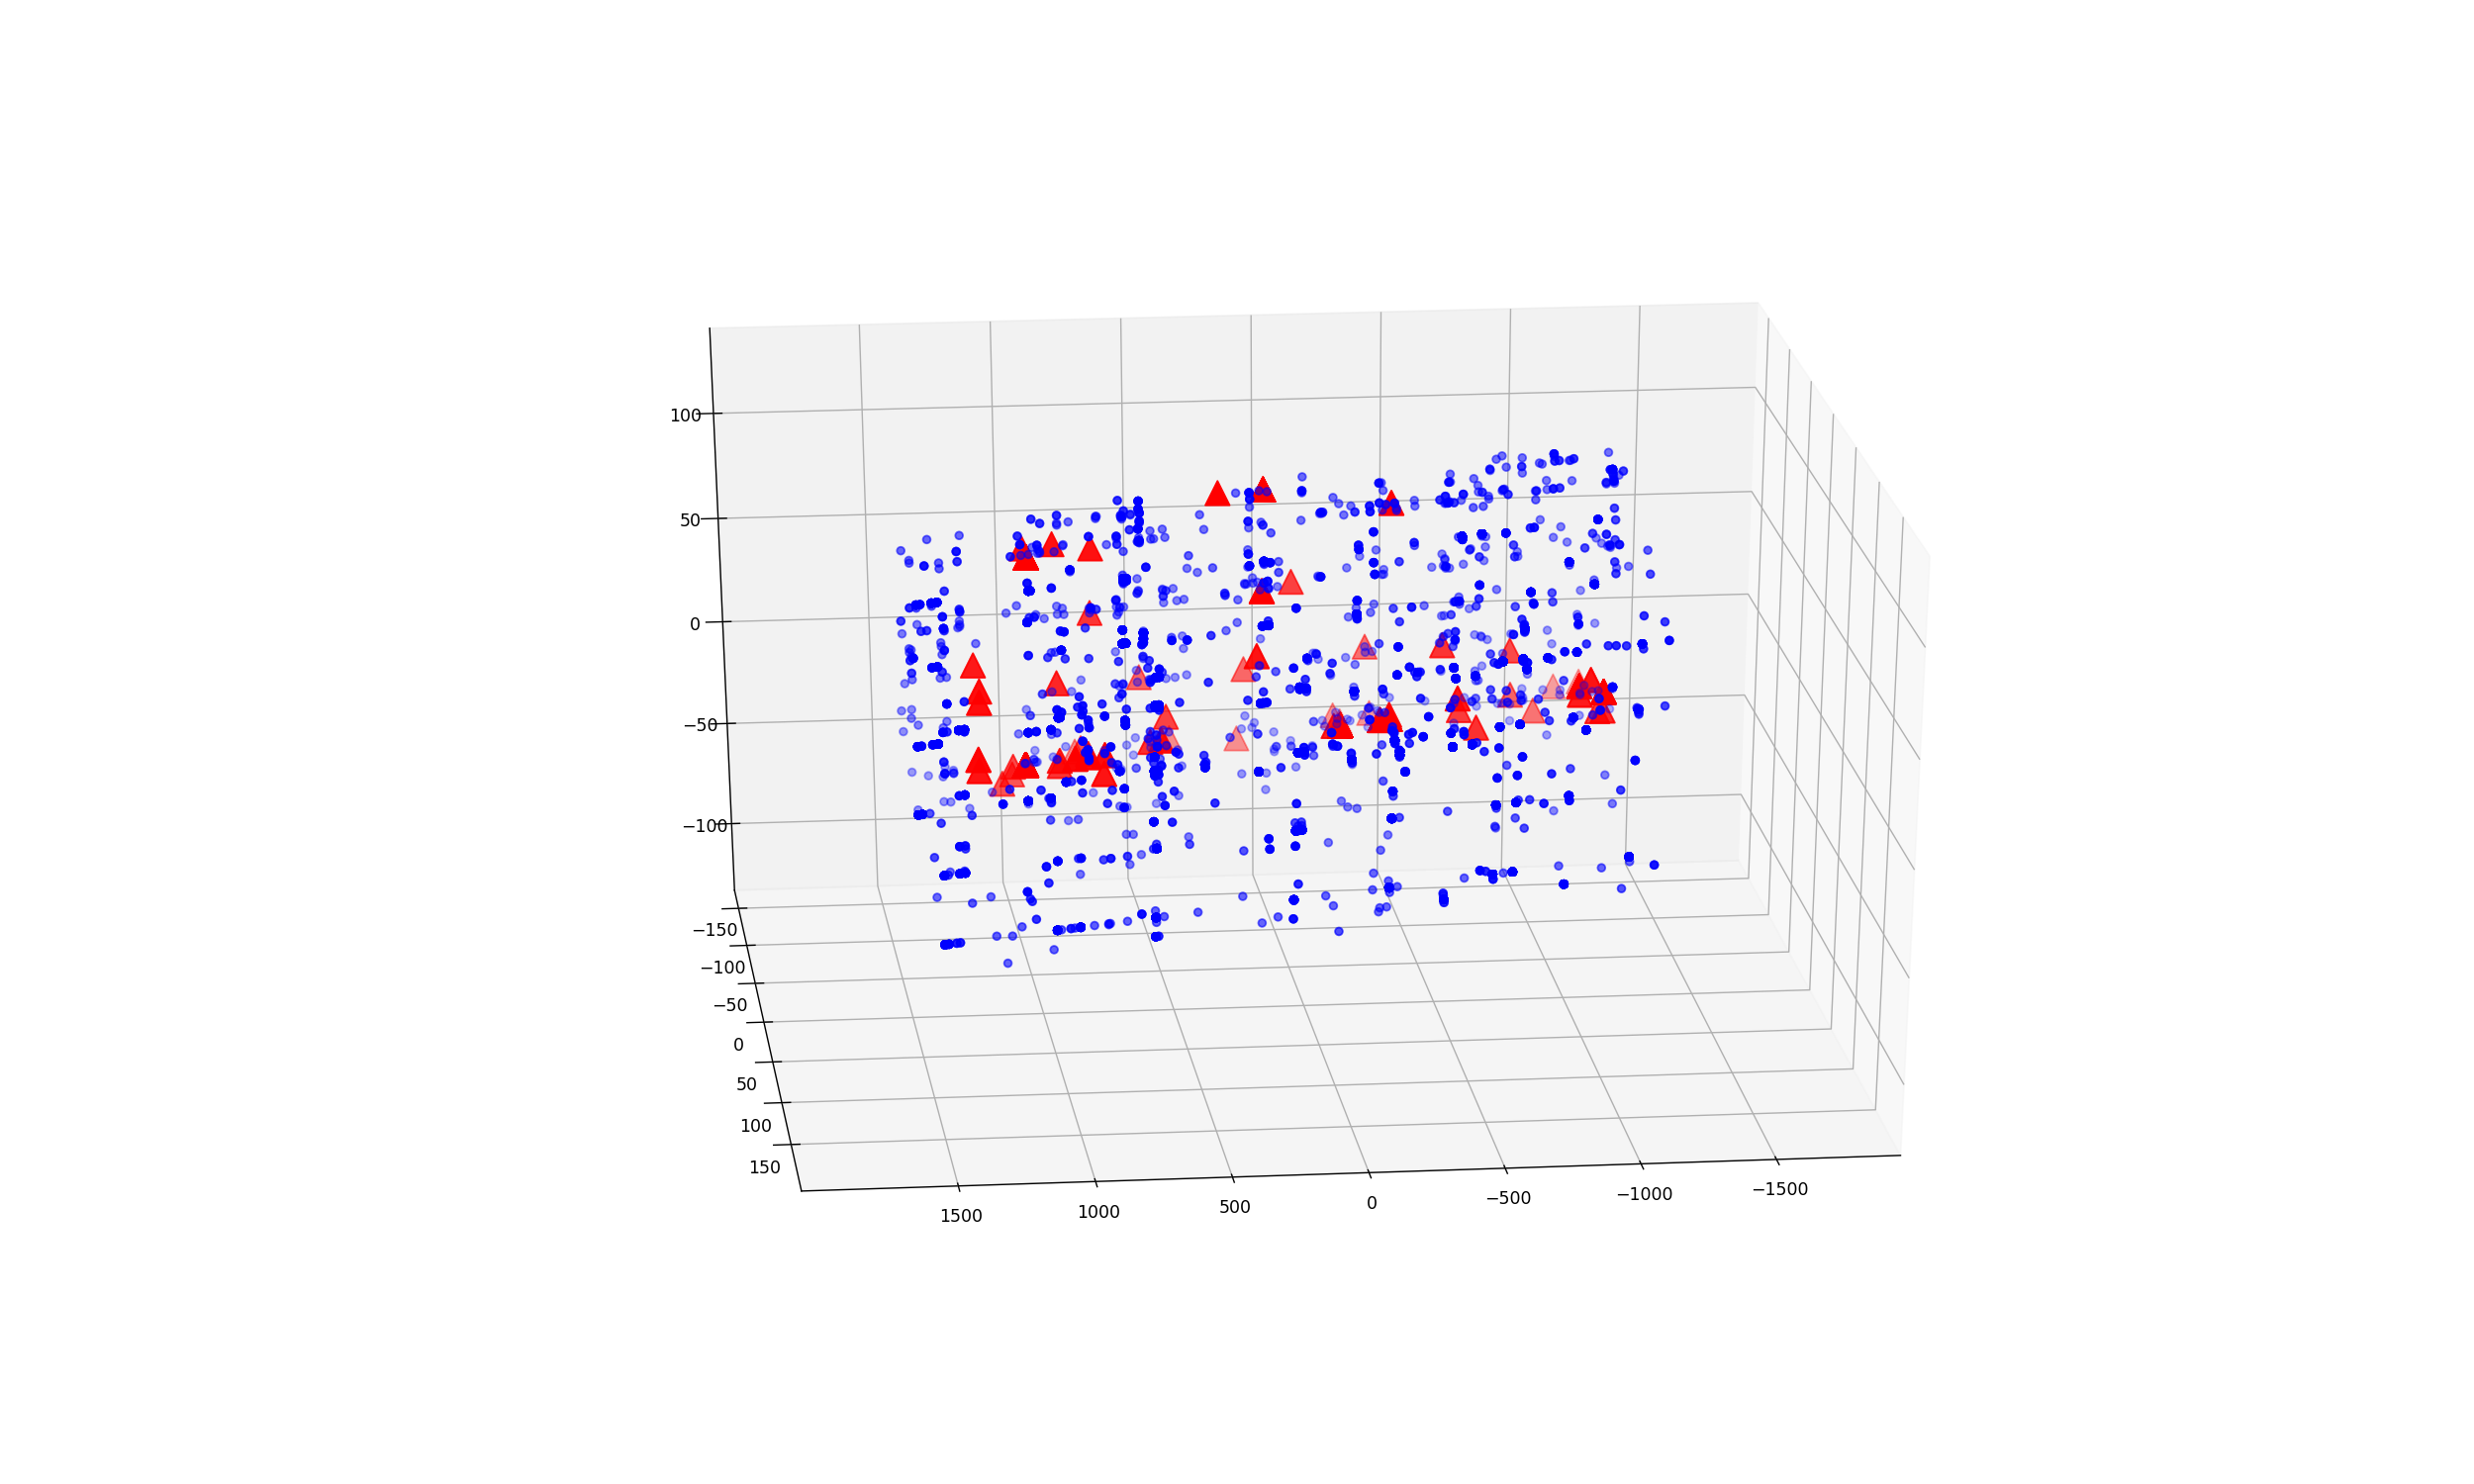

In [54]:
%matplotlib notebook

from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 12))
ax = plt.axes(projection="3d")
ax.scatter3D(data_trans_3d[data['label'].values == 0][:10000, 0], data_trans_3d[data['label'].values == 0][:10000, 1], data_trans_3d[data['label'].values == 0][:10000, 2], color = 'b', label = 'Non-Fraud')
ax.scatter3D(data_trans_3d[data['label'].values == 1][:, 0], data_trans_3d[data['label'].values == 1][:, 1], data_trans_3d[data['label'].values == 1][:, 2], color = 'r', s = 200, marker = '^', label = 'Fraud')


In [117]:
s = data[data["label"]==1][["label", "cc_organization"]].groupby("cc_organization").count()


In [120]:
s = s.rename(d["cc_organization"], axis='index')

<IPython.core.display.Javascript object>


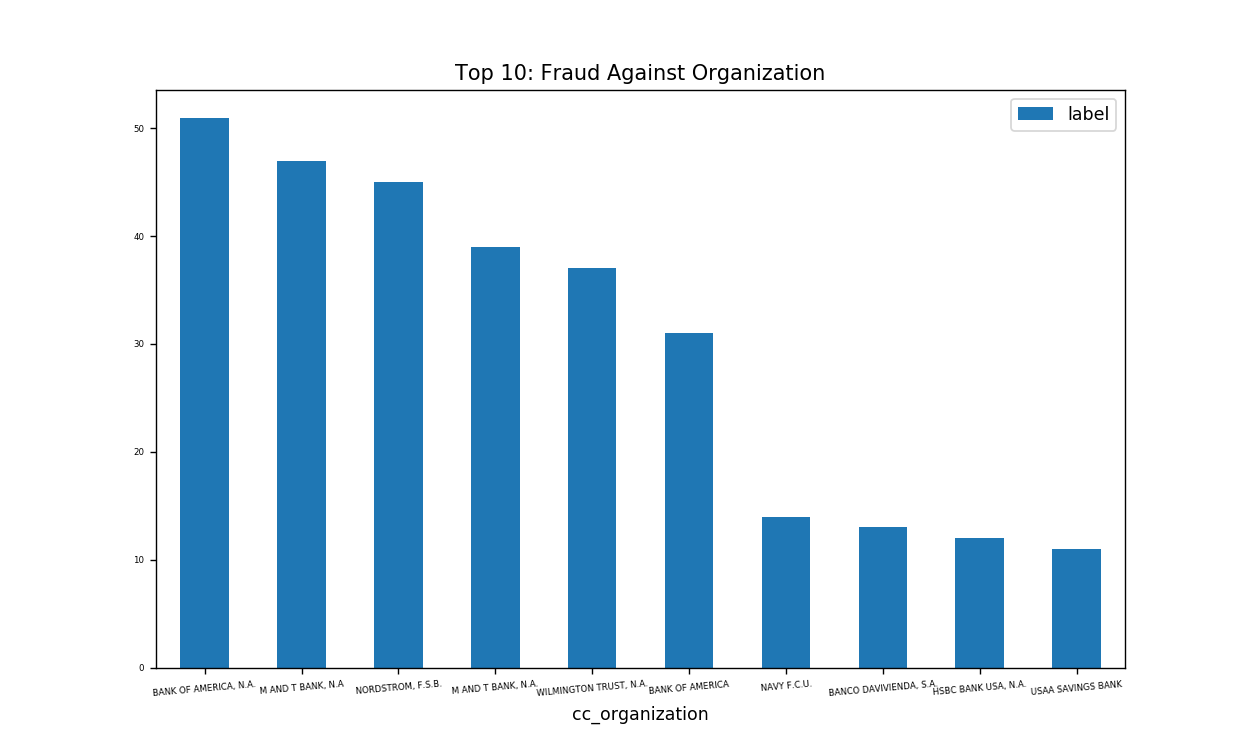

In [153]:
s.sort_values(["label"], ascending = False)[:10].plot.bar(figsize = (10, 6), rot = 5, title = "Top 10: Fraud Against Organization", fontsize = 5)



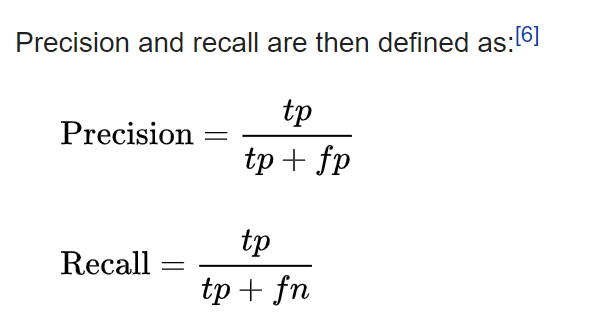

In [170]:
y_pred = (data['total_score'] > 50).values
y_true = data['label']

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1509649
           1       1.00      0.74      0.85       414

    accuracy                           1.00   1510063
   macro avg       1.00      0.87      0.93   1510063
weighted avg       1.00      1.00      1.00   1510063



In [174]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

In [173]:
list(range(10, 110, 10))

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [178]:
thres = []
tns, fps, fns, tps = [], [], [], []
pres = []
rec = [] 
f1s = [] 

for threshold in list(range(10, 110, 10)):
    y_pred = (data['total_score'] > threshold).values
    y_true = data['label']
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    precision =  tp/(tp + fp)
    recall =  tp/(tp+fn)
    
    f1 =  2 * (precision * recall) / (precision + recall)
    
    thres.append(threshold)
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp)
    pres.append(precision)
    rec.append(recall)
    f1s.append(f1)
    
    #print("TP,     FP,     FN,     TP,     Precision, Recall, F1")
    #print(tn, fp, fn, tp, round(precision, 2), round(recall, 2), round(f1, 2) )

/home/karkin.mun/environments/ml_dir/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


In [181]:
pd.DataFrame(
    
    {
        "Threshold": thres,
        "True Negative": tns, 
        "False Positive": fps,
        "False Negative": fns,
        "True Positives": tps,
        "Precision": pres,
        "Recall": rec,
        "F1-Score": f1s
        
    }

)

,F1-Score,False Negative,False Positive,Precision,Recall,Threshold,True Negative,True Positives
0,0.017635,10,44999,0.008898,0.975845,10,1464650,404
1,0.036958,22,20407,0.018847,0.946860,20,1489242,392
2,0.062938,37,11189,0.032596,0.910628,30,1498460,377
3,0.180934,79,2954,0.101855,0.809179,40,1506695,335
4,0.853186,106,0,1.000000,0.743961,50,1509649,308
5,0.801737,137,0,1.000000,0.669082,60,1509649,277
6,0.529307,265,0,1.000000,0.359903,70,1509649,149
7,0.428843,301,0,1.000000,0.272947,80,1509649,113
8,0.340681,329,0,1.000000,0.205314,90,1509649,85
9,NaN,414,0,NaN,0.000000,100,1509649,0


<IPython.core.display.Javascript object>


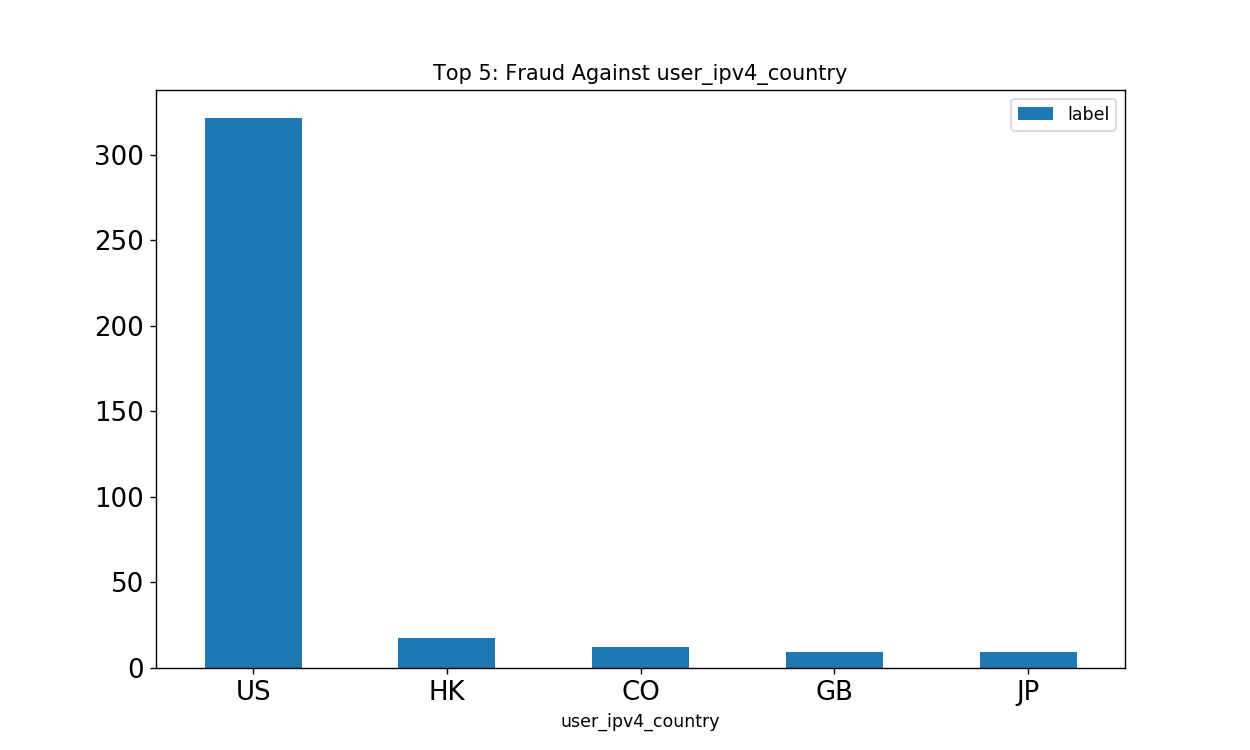

In [186]:
s = data[data["label"]==1][["label", "user_ipv4_country"]].groupby("user_ipv4_country").count()
s = s.rename(d["user_ipv4_country"], axis='index')
s.sort_values(["label"], ascending = False)[:5].plot.bar(figsize = (10, 6), rot = 0, title = "Top 5: Fraud Against user_ipv4_country", fontsize = 15)


<IPython.core.display.Javascript object>


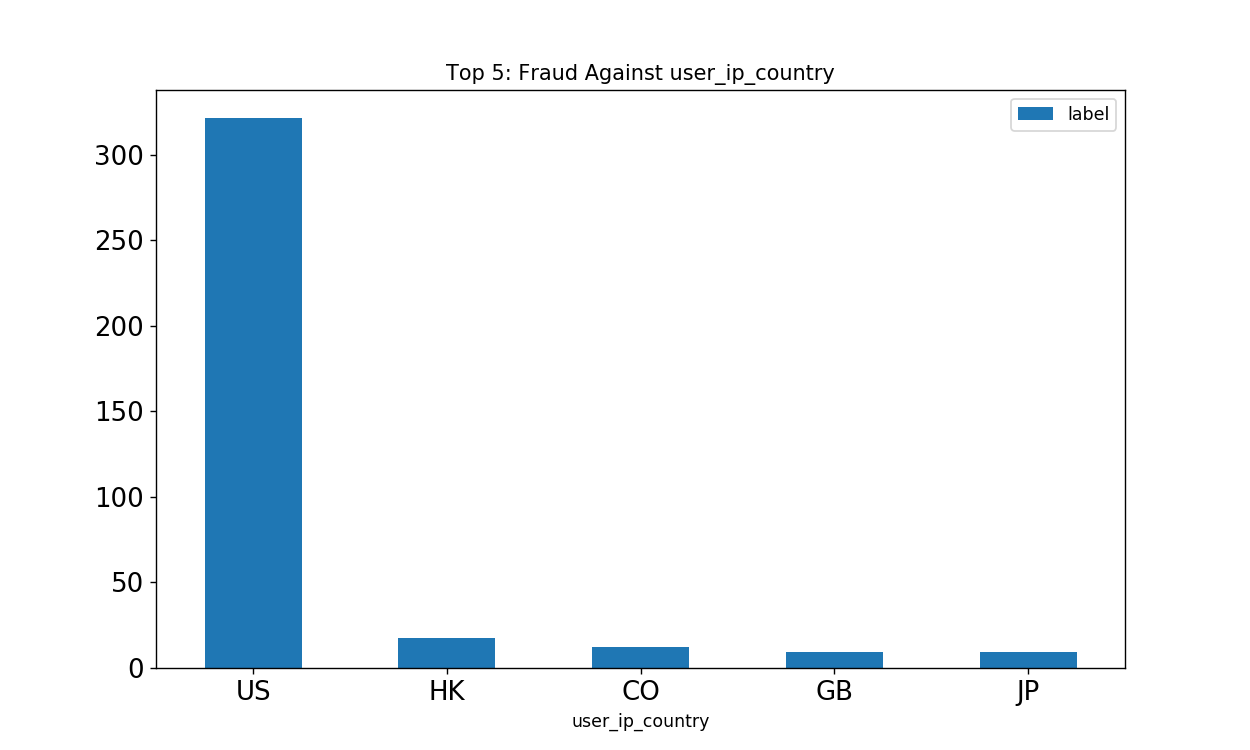

In [190]:
s = data[data["label"]==1][["label", "user_ip_country"]].groupby("user_ip_country").count()
s = s.rename(d["user_ip_country"], axis='index')
s.sort_values(["label"], ascending = False)[:5].plot.bar(figsize = (10, 6), rot = 0, title = "Top 5: Fraud Against user_ip_country", fontsize = 15)


<IPython.core.display.Javascript object>


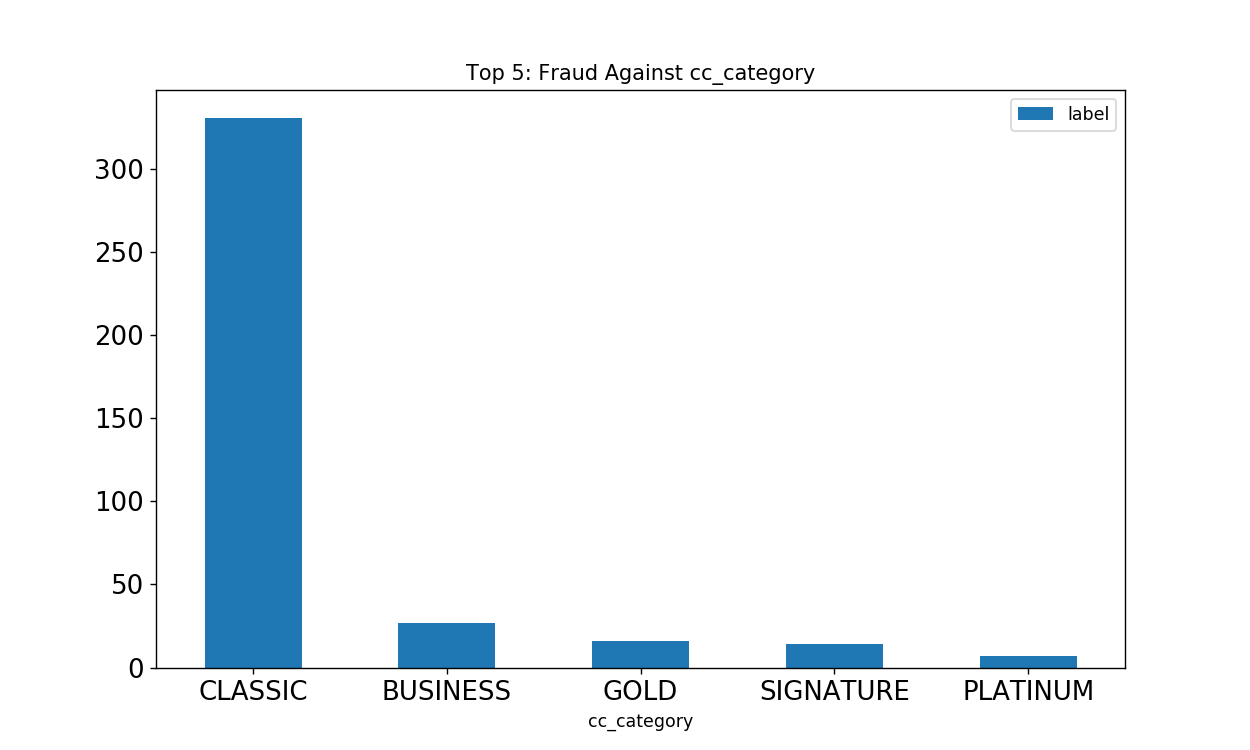

In [187]:
s = data[data["label"]==1][["label", "cc_category"]].groupby("cc_category").count()
s = s.rename(d["cc_category"], axis='index')
s.sort_values(["label"], ascending = False)[:5].plot.bar(figsize = (10, 6), rot = 0, title = "Top 5: Fraud Against cc_category", fontsize = 15)


In [189]:
d["merch_name"][168]

'Resort World Sentosa - ESERVICES'

<IPython.core.display.Javascript object>


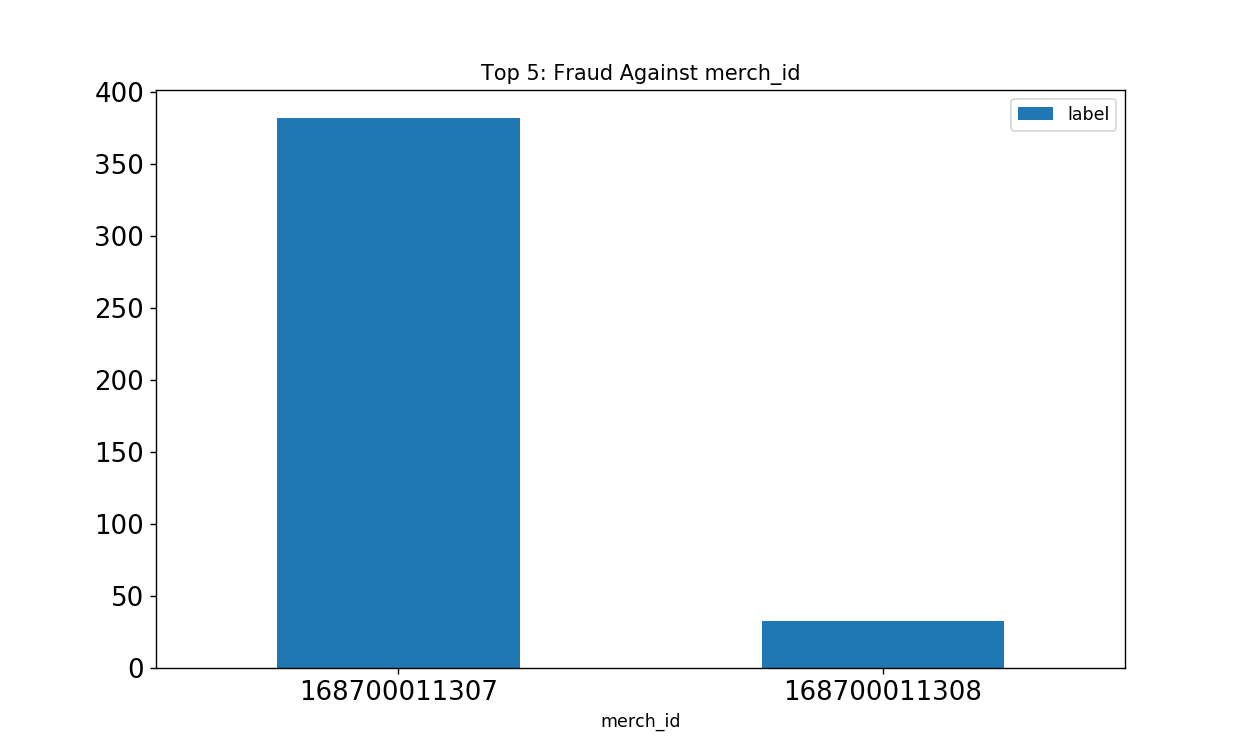

In [196]:
s = data[data["label"]==1][["label", "merch_id"]].groupby("merch_id").count()
s = s.rename(d["merch_id"], axis='index')
s.sort_values(["label"], ascending = False)[:5].plot.bar(figsize = (10, 6), rot = 0, title = "Top 5: Fraud Against merch_id", fontsize = 15)


In [195]:
d["merch_id"][5], d["merch_id"][6]

('168700011307', '168700011308')

In [211]:
data_exploration_2 = data.drop(["transaction_datetime", "cc_exp_date" ,  "label", "time_of_day_hr"], axis=1)
data_exploration_2.head()

,cc_category,billing_currency,cc_organization,merch_name,user_ipv4_country,user_ip_country,merch_id,cc_type,cc_brand,transaction_channel,total_score,blocked,whitelisted,had_ai_downtime,time_of_day
1,18,3,689,168,159,159,5,2,10,0.0,36.0,False,False,False,5.250000
2,18,3,689,168,159,159,5,2,10,0.0,36.0,False,False,False,5.866667
3,18,3,689,168,159,159,5,2,10,0.0,99.0,False,False,False,10.550000
4,18,3,689,168,77,77,5,2,10,0.0,43.0,False,False,False,10.950000
5,18,3,689,168,159,159,5,2,10,0.0,99.0,False,False,False,12.166667


<IPython.core.display.Javascript object>


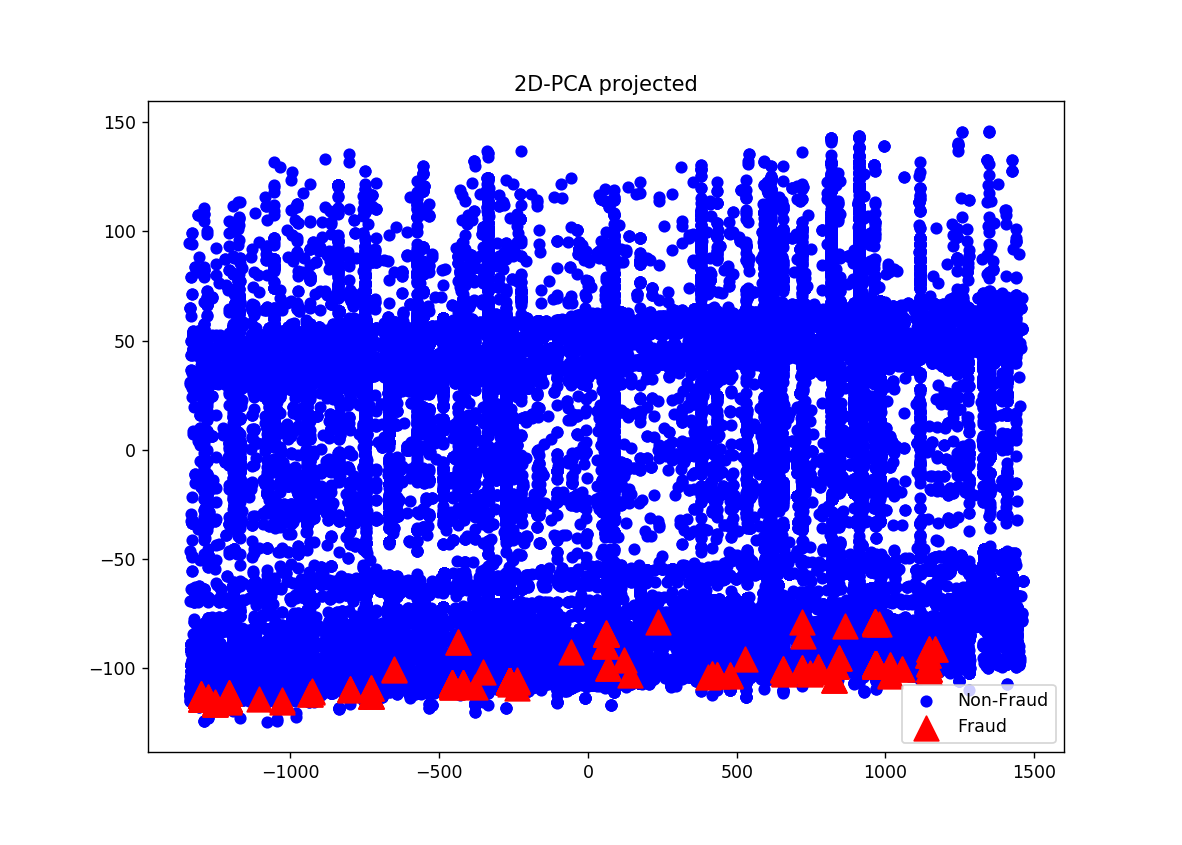

In [213]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data_exploration_2[data["label"] == 0].values)  
data_trans_2 = pca.transform(data_exploration_2.values)


plt.figure(figsize=(8, 6))
plt.scatter(data_trans_2[data['label'].values == 0][:, 0], data_trans_2[data['label'].values == 0][:, 1], color = 'b', label = 'Non-Fraud')
plt.scatter(data_trans_2[data['label'].values == 1][:, 0], data_trans_2[data['label'].values == 1][:, 1], color = 'r', s = 200, marker = '^', label = 'Fraud')
plt.title('2D-PCA projected')
plt.legend()


<IPython.core.display.Javascript object>


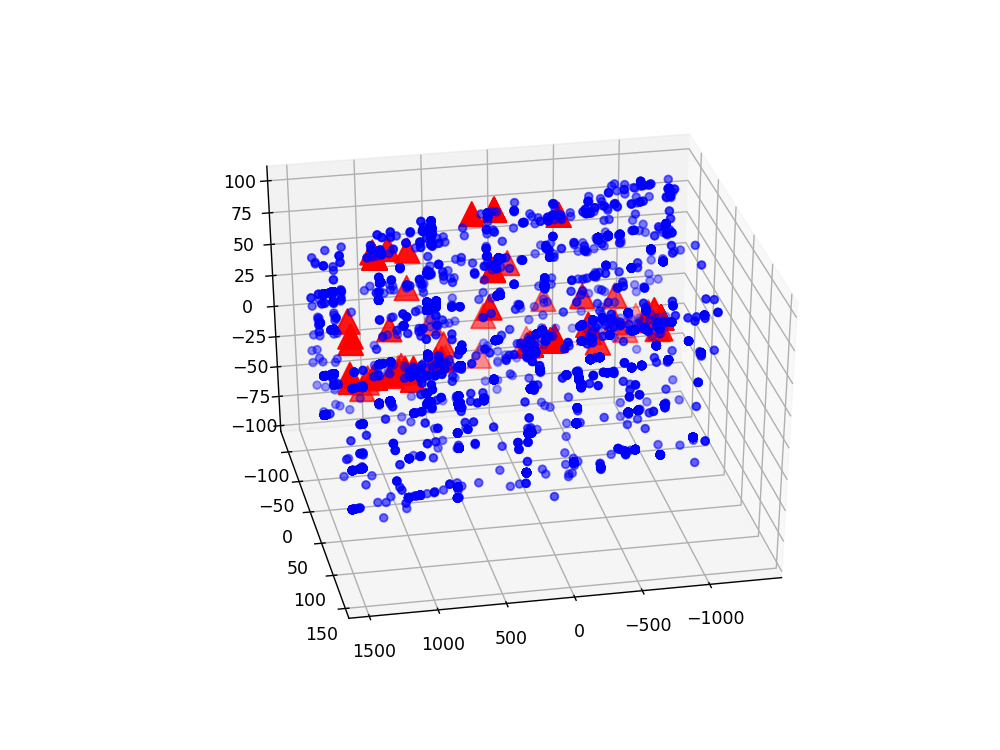

In [214]:
%matplotlib notebook

pca_3d = PCA(n_components=3)
pca_3d.fit(data_exploration_2[data["label"] == 0].values)  
data_trans_3d = pca_3d.transform(data_exploration_2.values)

plt.figure(figsize=(8, 6))
ax = plt.axes(projection="3d")
ax.scatter3D(data_trans_3d[data['label'].values == 0][:10000, 0], data_trans_3d[data['label'].values == 0][:10000, 1], data_trans_3d[data['label'].values == 0][:10000, 2], color = 'b', label = 'Non-Fraud')
ax.scatter3D(data_trans_3d[data['label'].values == 1][:, 0], data_trans_3d[data['label'].values == 1][:, 1], data_trans_3d[data['label'].values == 1][:, 2], color = 'r', s = 200, marker = '^', label = 'Fraud')


## Training 

In [44]:
columns_probably_not_required = ["plugin_data", "response", "score_from_ai", "transaction_id_ext", "_id", "cc_hash"]
columns_too_many_NaN = ['user_ipv6_country', 
           'billing_country_alpha2', 
           "transaction_id_merch",
"shipping_postal_code",          
"shipping_state",                
"user_phone",                    
"transaction_delivery_mode", 
"ticket_date",                   
"ticket_count",                  
"ticket_multiuse",               
"ticket_type_bundle",            
"hotel_checkin_date",            
"hotel_number_nights",  
"hotel_number_rooms",            
"hotel_country_alpha2",          
"hotel_city",                    
"nonhotel_billing_amt",          
"errors"                        ]

# Note, user_ipv4_country is the same as user_ip_country
cat_columns_non_ordinal = ["cc_category", "cc_organization", "merch_name", 
                           "user_ipv4_country", "user_ip_country", "merch_id",
                            "cc_type", "cc_brand", "billing_currency"]





In [206]:
set(data['transaction_channel'].values)

{0.0, 5.0}

In [207]:
data.head()

,cc_category,billing_currency,cc_organization,merch_name,transaction_datetime,user_ipv4_country,user_ip_country,merch_id,cc_type,cc_exp_date,cc_brand,transaction_channel,total_score,blocked,whitelisted,had_ai_downtime,label,time_of_day,time_of_day_hr
1,18,3,689,168,2018-08-15 05:15:43.273,159,159,5,2,1.561939e+09,10,0.0,36.0,False,False,False,1,5.250000,5
2,18,3,689,168,2018-08-15 05:52:46.510,159,159,5,2,1.561939e+09,10,0.0,36.0,False,False,False,1,5.866667,5
3,18,3,689,168,2018-08-15 10:33:37.191,159,159,5,2,1.561939e+09,10,0.0,99.0,False,False,False,1,10.550000,10
4,18,3,689,168,2018-08-15 10:57:04.755,77,77,5,2,1.561939e+09,10,0.0,43.0,False,False,False,1,10.950000,10
5,18,3,689,168,2018-08-15 12:10:19.081,159,159,5,2,1.604189e+09,10,0.0,99.0,False,False,False,1,12.166667,12


In [222]:
data_modelling = data.drop(["user_ip_country", "cc_exp_date", "time_of_day_hr", "transaction_datetime"], axis = 1 )
data_modelling.head()

,cc_category,billing_currency,cc_organization,merch_name,user_ipv4_country,merch_id,cc_type,cc_brand,transaction_channel,total_score,blocked,whitelisted,had_ai_downtime,label,time_of_day
1,18,3,689,168,159,5,2,10,0.0,36.0,False,False,False,1,5.250000
2,18,3,689,168,159,5,2,10,0.0,36.0,False,False,False,1,5.866667
3,18,3,689,168,159,5,2,10,0.0,99.0,False,False,False,1,10.550000
4,18,3,689,168,77,5,2,10,0.0,43.0,False,False,False,1,10.950000
5,18,3,689,168,159,5,2,10,0.0,99.0,False,False,False,1,12.166667


### Attempt (1) : Train on only negative samples, and test on neg and pos samples 

Step 1: PCA Projection 

Step 2: One Class SVM 

In [223]:
data_modelling_neg = data_modelling[data_modelling['label'] == 0]
data_modelling_pos = data_modelling[data_modelling['label'] == 1]

In [224]:
from sklearn.model_selection import train_test_split

X = data_modelling_neg.loc[:, data_modelling_neg.columns != 'label']
y = data_modelling_neg['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [234]:
x_pos_comb = data_modelling_pos.loc[:, data_modelling_pos.columns != 'label']
y_pos_comb = data_modelling_pos['label']

X_val = pd.concat([x_pos_comb, X_val])
y_val = pd.concat([y_pos_comb, y_val])

X_val.shape, y_val.shape

((302758, 14), (302758,))

In [235]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)

In [236]:
pca = PCA(0.95)
pca.fit(X_train_norm)


PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [237]:
X_train_norm_PCA = pca.transform(X_train_norm)
X_val_norm_PCA = pca.transform(X_val_norm)

In [238]:
X_train_norm_PCA.shape, X_val_norm_PCA.shape

((1207719, 7), (302758, 7))

In [ ]:
from sklearn import svm

clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train_norm_PCA)


In [ ]:
y_pred_train = clf.predict(X_train_norm_PCA)
y_pred_val = clf.predict(X_val_norm_PCA)

## Affinity Propagation
http://genes.toronto.edu/affinitypropagation/faq.html

preference: The preference of point i, called p(i) or s(i,i), is the a priori suitability of point i to serve as an exemplar. Preferences can be set to a global (shared) value, or customized for particular data points. High values of the preferences will cause affinity propagation to find many exemplars (clusters), while low values will lead to a small number of exemplars (clusters). A good initial choice for the preference is the minimum similarity or the median similarity.


## Auto Encoder

In [80]:
len(data.columns)

17

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1, 1))
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)

In [105]:
"""
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

# this is the size of our encoded representations
encoding_dim = 5 

input_data = Input(shape=(X_train.shape[1],))

encoded = Dense(encoding_dim, activation='relu')(input_data) #, activity_regularizer=regularizers.l1(10e-5))(encoded)

decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_data, decoded)

encoder = Model(input_data, encoded)
"""
pass

In [145]:


from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

# this is the size of our encoded representations
encoding_dim = 6

input_data = Input(shape=(X_train.shape[1],))
encoded = Dense(100, activation ='tanh', activity_regularizer=regularizers.l1(10e-5))(input_data)
encoded = Dense(50, activation ='relu')(encoded)

encoded = Dense(encoding_dim, activation='relu')(encoded) #, activity_regularizer=regularizers.l1(10e-5))(encoded)

decoded = Dense(50, activation ='tanh')(encoded)
#decoded = Dense(30, activation ='relu')(decoded)
decoded = Dense(X_train.shape[1], activation='relu')(decoded)

autoencoder = Model(input_data, decoded)

encoder = Model(input_data, encoded)


In [146]:
"""
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

# this is the size of our encoded representations
encoding_dim = 5

input_data = Input(shape=(X_train.shape[1],))
encoded = Dense(30, activation ='tanh')(input_data)
encoded = Dense(15, activation ='tanh')(encoded)

encoded = Dense(encoding_dim, activation='tanh')(encoded) #, activity_regularizer=regularizers.l1(10e-5))(encoded)

decoded = Dense(15, activation ='tanh')(encoded)
decoded = Dense(30, activation ='tanh')(decoded)
decoded = Dense(X_train.shape[1], activation='relu')(decoded)

autoencoder = Model(input_data, decoded)

encoder = Model(input_data, encoded)
"""
pass

In [147]:
autoencoder.compile(optimizer='adadelta', loss='mse')

In [148]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 16)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 100)               1700      
_________________________________________________________________
dense_65 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_66 (Dense)             (None, 6)                 306       
Total params: 7,056
Trainable params: 7,056
Non-trainable params: 0
_________________________________________________________________


In [151]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 6)

autoencoder.fit(X_train_norm[y_train == 0], X_train_norm[y_train == 0],
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val_norm[y_val == 0], X_val_norm[y_val == 0]),
                callbacks=[es])

Train on 1199986 samples, validate on 299997 samples
Epoch 1/500
1199986/1199986 [==============================] - 21s 17us/step - loss: 0.0608 - val_loss: 0.0409
Epoch 2/500
1199986/1199986 [==============================] - 20s 17us/step - loss: 0.0613 - val_loss: 0.0392
Epoch 3/500
1199986/1199986 [==============================] - 20s 17us/step - loss: 0.0615 - val_loss: 0.0426
Epoch 4/500
1199986/1199986 [==============================] - 20s 17us/step - loss: 0.0617 - val_loss: 0.0375
Epoch 5/500
1199986/1199986 [==============================] - 21s 17us/step - loss: 0.0623 - val_loss: 0.0386
Epoch 6/500
1199986/1199986 [==============================] - 21s 17us/step - loss: 0.0629 - val_loss: 0.0386
Epoch 7/500
1199986/1199986 [==============================] - 20s 17us/step - loss: 0.0634 - val_loss: 0.0382
Epoch 8/500
1199986/1199986 [==============================] - 21s 17us/step - loss: 0.0526 - val_loss: 0.0251
Epoch 9/500
1199986/1199986 [==============================

In [150]:
X_train.shape

(1200306, 16)